In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset/test/alligator/alligator_25.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_11.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_5.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_3.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_40.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_36.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_22.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_46.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_99.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_17.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_49.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_50.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_64.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_33.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_1.jpeg
/kaggle/input/dataset/dataset/test/alligator/alligator_82.

In [2]:
%matplotlib inline

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


In [4]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert('RGB') if x.mode != 'RGB' else x),
    transforms.Resize((224, 224)),  # Thay đổi kích thước hình ảnh
    transforms.ToTensor(),  # Chuyển đổi PIL Image sang Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Chuẩn hóa
])


# Tải dữ liệu từ thư mục của bạn
trainset = torchvision.datasets.ImageFolder(root='/kaggle/input/dataset/dataset/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='/kaggle/input/dataset/dataset/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Định nghĩa các lớp trong bộ dữ liệu của bạn
classes = ('alligator', 'koi', 'shark')

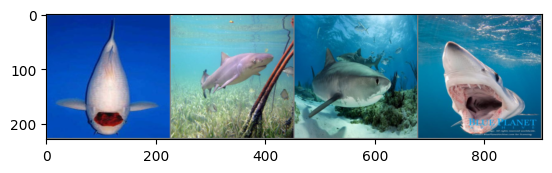

koi   shark shark shark


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Định nghĩa các lớp tương ứng trong bộ dữ liệu mới
classes = ('alligator', 'koi', 'shark')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # chuyển từ (C, H, W) sang (H, W, C)
    plt.show()

# Lấy một số hình ảnh ngẫu nhiên từ tập dữ liệu huấn luyện
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Hiển thị hình ảnh
imshow(torchvision.utils.make_grid(images))

# In nhãn tương ứng
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))  # Sửa đổi để phù hợp với số lượng hình ảnh thực tế trong một batch


In [6]:
!pip install torchsummary

In [7]:
# -*- coding: utf-8 -*-

import torch.nn as nn
import torch.nn.functional as F
import torch

class Net(nn.Module):
    def __init__(self,nclass=3):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 7, padding = 3, stride = 1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding = 1, stride = 1)
        self.conv3 = nn.Conv2d(64, 64, 3, padding = 1, stride=2)
        self.avg = nn.AvgPool2d(2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1, stride = 1)

        self.avg1 = nn.AvgPool2d(4)
        self.conv5 = nn.Conv2d(256, 256, 3, padding = 1, stride = 1)
        self.maxpool=nn.MaxPool2d(2)
        self.conv6 = nn.Conv2d(256, 320, 3, padding = 1,  stride = 1)

        self.conv7 = nn.Conv2d(320, 320, 3, padding = 1,  stride = 2)

        self.conv8 = nn.Conv2d(640, 704, 3, padding = 1,  stride = 2)

        self.conv9 = nn.Conv2d(704, 768, 3, padding = 1,  stride = 1)

        self.avg2 = nn.AdaptiveAvgPool2d(1)

        self.fc1 = nn.Linear(768*1*1, 512)
        self.fc2 = nn.Linear(512, 128)
        #self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(128, nclass)

#OutputImage = ((ImageSize + 2*Padding) - KernalSize) / Stride) + 1

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x1 = F.relu(self.conv3(x))
        x2 = self.avg(x)
        x1_1 = F.relu(self.conv4(x1))
        x2_1 = F.relu(self.conv4(x2))
        x3 = torch.cat((x1_1, x2_1), dim=1)

        x4_1 = F.relu(self.conv5(x3))
        x4_1 = self.maxpool(x4_1)
        x4_1 = F.relu(self.conv6(x4_1)) #(nhanh1)
        x4_2 = self.avg1(x3) #(nhanh2)

        x5_1 = self.avg(x4_1)
        x5_2 = F.relu(self.conv7(x4_1))

        x5_1 = F.relu(x5_1 + x5_2) #(nhanh1)
        x5_2 = F.relu(self.conv6(x4_2)) #(nhanh2)

        x6 = torch.cat((x5_1, x5_2), dim=1)

        x6 = F.relu(self.conv8(x6))

        x7_1 = F.relu(self.conv9(x6))
        x7_2 = F.relu(self.conv9(x6))

        x8 = F.relu(x7_1+x7_2)

        x8 = self.avg2(x8)

        x8 = x8.view(-1, 768*1*1)
        x8 = (self.fc1(x8))
        x8 = (self.fc2(x8))
        x8 = self.fc3(x8)
        return x8
net = Net()
net = net.to(device)
from torchsummary import summary
summary(net,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]           4,736
            Conv2d-2         [-1, 64, 224, 224]          18,496
            Conv2d-3         [-1, 64, 112, 112]          36,928
         AvgPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
            Conv2d-6        [-1, 128, 112, 112]          73,856
            Conv2d-7        [-1, 256, 112, 112]         590,080
         MaxPool2d-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 320, 56, 56]         737,600
        AvgPool2d-10          [-1, 256, 28, 28]               0
        AvgPool2d-11          [-1, 320, 28, 28]               0
           Conv2d-12          [-1, 320, 28, 28]         921,920
           Conv2d-13          [-1, 320, 28, 28]         737,600
           Conv2d-14          [-1, 704,

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
import warnings

# Bỏ qua cảnh báo cụ thể về hình ảnh có độ trong suốt
warnings.filterwarnings("ignore", message="Palette images with Transparency expressed in bytes should be converted to RGBA images")


In [10]:

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:  # Điều chỉnh số này để thích hợp với số lượng batches của bạn
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
print('Finished Training')

[1,    50] loss: 1.105
[1,   100] loss: 1.098
[1,   150] loss: 1.102
[1,   200] loss: 1.099
[1,   250] loss: 1.098
[1,   300] loss: 1.100
[1,   350] loss: 1.098
[1,   400] loss: 1.099
[1,   450] loss: 1.097
[1,   500] loss: 1.100
[1,   550] loss: 1.097
[1,   600] loss: 1.097
[1,   650] loss: 1.097
[1,   700] loss: 1.095
[2,    50] loss: 1.089
[2,   100] loss: 1.087
[2,   150] loss: 1.065
[2,   200] loss: 1.023
[2,   250] loss: 0.829
[2,   300] loss: 0.666
[2,   350] loss: 0.637
[2,   400] loss: 0.583
[2,   450] loss: 0.665
[2,   500] loss: 0.618
[2,   550] loss: 0.652
[2,   600] loss: 0.611
[2,   650] loss: 0.649
[2,   700] loss: 0.577
[3,    50] loss: 0.549
[3,   100] loss: 0.573
[3,   150] loss: 0.563
[3,   200] loss: 0.607
[3,   250] loss: 0.567
[3,   300] loss: 0.591
[3,   350] loss: 0.562
[3,   400] loss: 0.559
[3,   450] loss: 0.578
[3,   500] loss: 0.555
[3,   550] loss: 0.456
[3,   600] loss: 0.491
[3,   650] loss: 0.394
[3,   700] loss: 0.472
[4,    50] loss: 0.476
[4,   100] 

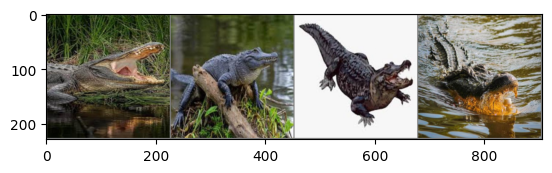

GroundTruth:  alligator alligator alligator alligator


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
outputs = net(images.to(device))

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  alligator alligator alligator alligator


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %


In [15]:

class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of alligator : 96 %
Accuracy of   koi : 94 %
Accuracy of shark : 90 %


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0
